In [26]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import math

import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
DATA_DIR = "/root/autodl-tmp/cervical_spine/"
TRAIN_IMAGE_DIR = os.path.join(DATA_DIR, "train_images_npy_croped")
TRAIN_SEG_DIR = os.path.join(DATA_DIR, "segmentations_npy_croped")

In [3]:
nii_files = glob.glob(TRAIN_SEG_DIR + "/*.npy")

### Class frequency weights

In [12]:
def count_frequency(mask):
    return np.bincount(mask.reshape(-1)) / (128*128*128)

In [13]:
a = np.load(nii_files[0]).reshape(-1)
count_frequency(a)

array([9.92038727e-01, 1.22547150e-03, 1.43861771e-03, 9.30309296e-04,
       9.76085663e-04, 9.35077667e-04, 1.16062164e-03, 1.29508972e-03])

In [16]:
total_freq = 0
for nii_path in tqdm(nii_files):
    freq = count_frequency(np.load(nii_path))
    total_freq += freq
    
total_freq /= len(nii_files)


100%|██████████| 87/87 [00:00<00:00, 116.80it/s]


In [17]:
total_freq

array([0.98830485, 0.00163332, 0.0020629 , 0.00138122, 0.00139588,
       0.00150409, 0.00165557, 0.00206217])

### Border weights
apply mean pooling to the binary mask

(1, 128, 128, 128)


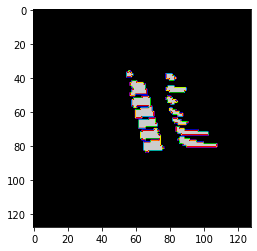

In [24]:
mask = np.load(nii_files[0])
mask[mask > 7] = 0
mask[mask > 0] = 1
print(mask.shape)
plt.imshow(mask[0, :, :, 64], cmap='nipy_spectral')

In [27]:
mask_tensor = torch.tensor(mask, dtype=torch.float)
mask_tensor.shape

torch.Size([1, 128, 128, 128])

In [30]:
pool_out = F.avg_pool3d(mask_tensor.unsqueeze(0), kernel_size=9, padding=4, stride=1).squeeze(0)
pool_out.shape

torch.Size([1, 128, 128, 128])

In [32]:
print(pool_out.min(), pool_out.max())

tensor(0.) tensor(0.8807)


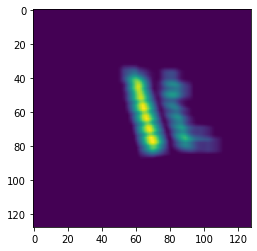

In [31]:
plt.imshow(pool_out[0, :, :, 64])

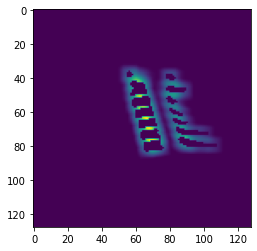

In [34]:
border_weight = pool_out * (1 - mask_tensor)
plt.imshow(border_weight[0, :, :, 64])